In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz
import scipy

# def create_lowpass_filter(cutoff_freq, fs, numtaps):
#     nyquist = 0.5 * fs
#     normalized_cutoff = cutoff_freq / nyquist
#     taps = scipy.signal.firwin(numtaps, normalized_cutoff)
#     return taps

# def impulse_response(filter_coeffs):
#     return scipy.signal.unit_impulse(len(filter_coeffs)), filter_coeffs

def apply_filter(signal, filter_coeffs):
    return scipy.signal.lfilter(filter_coeffs, 1.0, signal)

def create_lowpass_filter(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def impulse_response(b, a, num_samples=100):
    impulse = np.zeros(num_samples)
    impulse[0] = 1.0
    response = lfilter(b, a, impulse)
    return response


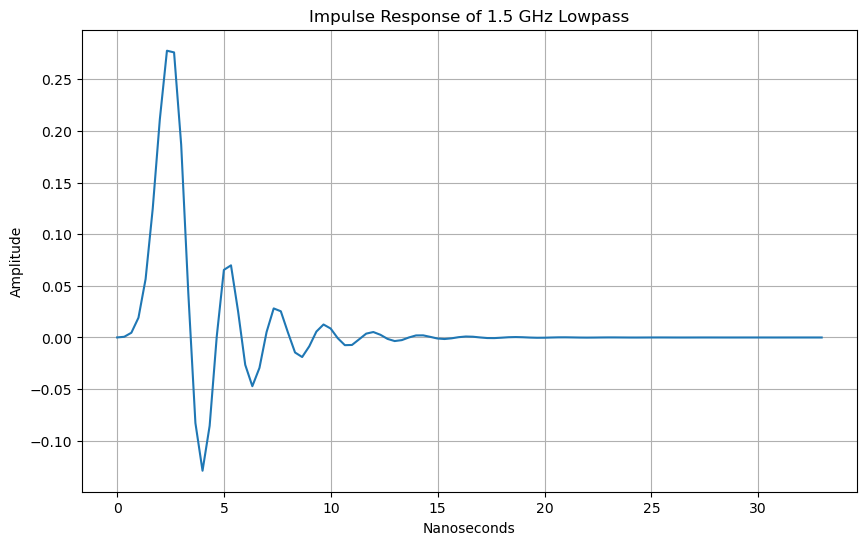

In [3]:

cutoff = 1.5e9  # 1.5 GHz
fs = 10e9      # Sampling frequency 10 GHz
order = 10

b, a = create_lowpass_filter(cutoff, fs, order)
response = impulse_response(b, a, 100)

# Plot the impulse response
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(response)) * 0.333, response)
plt.title('Impulse Response of 1.5 GHz Lowpass')
plt.xlabel('Nanoseconds')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()